# **Brett Huffman**

## **CSCI 5390**

## Main Project - Phase 3

Credit: The images for this project are from personal library and from Alamy.com covered under their Personal Use license.  Images can only be used for non-commercial purposes. 

In [1]:
!git clone https://github.com/dicer2000/CSCI_5390

Cloning into 'CSCI_5390'...
remote: Enumerating objects: 1034, done.
remote: Counting objects: 100% (1034/1034), done.
remote: Compressing objects: 100% (1014/1014), done.
remote: Total 1034 (delta 23), reused 1030 (delta 19), pack-reused 0
Receiving objects: 100% (1034/1034), 35.38 MiB | 14.53 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [2]:
# Checkout just the images folder from Github
! ls -l CSCI_5390/MainProject/Images

total 32
drwxr-xr-x 2 root root  4096 Mar 10 02:10 Ash
drwxr-xr-x 2 root root  4096 Mar 10 02:10 Cedar
drwxr-xr-x 2 root root 12288 Mar 10 02:10 Honeysuckle
drwxr-xr-x 2 root root  4096 Mar 10 02:10 Maple
drwxr-xr-x 2 root root  4096 Mar 10 02:10 Oak
-rw-r--r-- 1 root root   593 Mar 10 02:10 removeBlack.py


In [3]:
# Check out the index file
import pandas as pd
df = pd.read_csv('CSCI_5390/MainProject/TreeImageMaster.csv')
df.head()

,id,image,treetype
0,1,Images/Oak/oak125.jpeg,1
1,2,Images/Oak/oak133.jpeg,1
2,3,Images/Oak/oak42.jpg,1
3,4,Images/Oak/oak56.jpg,1
4,5,Images/Oak/oak81.jpg,1


In [4]:
# Import important libraries
import tensorflow as tf
import numpy as np
import math
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras import layers, initializers
import matplotlib.pyplot as plt
from tensorflow import keras

In [5]:
# Generate the Validation And Test Folders

!mkdir CSCI_5390/MainProject/Validation
!mkdir CSCI_5390/MainProject/Validation/Images
!mkdir CSCI_5390/MainProject/Validation/Images/Ash
!mkdir CSCI_5390/MainProject/Validation/Images/Cedar
!mkdir CSCI_5390/MainProject/Validation/Images/Honeysuckle
!mkdir CSCI_5390/MainProject/Validation/Images/Maple
!mkdir CSCI_5390/MainProject/Validation/Images/Oak

!mkdir CSCI_5390/MainProject/Testing
!mkdir CSCI_5390/MainProject/Testing/Images
!mkdir CSCI_5390/MainProject/Testing/Images/Ash
!mkdir CSCI_5390/MainProject/Testing/Images/Cedar
!mkdir CSCI_5390/MainProject/Testing/Images/Honeysuckle
!mkdir CSCI_5390/MainProject/Testing/Images/Maple
!mkdir CSCI_5390/MainProject/Testing/Images/Oak

In [6]:

# Randomly move images from the main folder (Training) to Validation
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

df = shuffle(df)
npdata = np.asarray(df)

# 70% Training, 15% Test, 15 Validation
X = npdata[:, :-1]
y = npdata[:, -1]
XTRAIN, XVALID, YTRAIN, YVALID = train_test_split(X, y, test_size=0.3)
XVALID, XTEST, YVALID, YTEST = train_test_split(XVALID, YVALID, test_size=0.5)


In [7]:
print(XTRAIN.shape, YTRAIN.shape)
print(XTEST.shape, YTEST.shape)
print(XVALID.shape, YVALID.shape)

(557, 2) (557,)
(120, 2) (120,)
(120, 2) (120,)


In [7]:
# Move all the designated files over to the Validation folders

for file in XVALID[:,1]:
  origFile = "CSCI_5390/MainProject/" + str(file)
  newFile  = "CSCI_5390/MainProject/Validation/" + str(file)
  print('-----')
  print(file)
  print(origFile)

  !mv $origFile $newFile


-----
Images/Honeysuckle/hs229.jpeg
CSCI_5390/MainProject/Images/Honeysuckle/hs229.jpeg
-----
Images/Ash/ash4.jpg
CSCI_5390/MainProject/Images/Ash/ash4.jpg
-----
Images/Oak/oak122.jpeg
CSCI_5390/MainProject/Images/Oak/oak122.jpeg
-----
Images/Honeysuckle/hs41.jpeg
CSCI_5390/MainProject/Images/Honeysuckle/hs41.jpeg
-----
Images/Honeysuckle/hs196.jpeg
CSCI_5390/MainProject/Images/Honeysuckle/hs196.jpeg
-----
Images/Cedar/cdr74.jpeg
CSCI_5390/MainProject/Images/Cedar/cdr74.jpeg
-----
Images/Cedar/cdr40.jpg
CSCI_5390/MainProject/Images/Cedar/cdr40.jpg
-----
Images/Oak/oak80.jpg
CSCI_5390/MainProject/Images/Oak/oak80.jpg
-----
Images/Cedar/cdr25.jpg
CSCI_5390/MainProject/Images/Cedar/cdr25.jpg
-----
Images/Honeysuckle/hs53.jpeg
CSCI_5390/MainProject/Images/Honeysuckle/hs53.jpeg
-----
Images/Ash/ash114.jpeg
CSCI_5390/MainProject/Images/Ash/ash114.jpeg
-----
Images/Honeysuckle/hs161.jpeg
CSCI_5390/MainProject/Images/Honeysuckle/hs161.jpeg
-----
Images/Ash/ash110.jpeg
CSCI_5390/MainProject/Ima

In [8]:
# Move all the designated files over to the Test folders

for file in XTEST[:,1]:
  origFile = "CSCI_5390/MainProject/" + str(file)
  newFile  = "CSCI_5390/MainProject/Testing/" + str(file)
  print('-----')
  print(file)
  print(origFile)

  !mv $origFile $newFile

-----
Images/Ash/ash141.jpeg
CSCI_5390/MainProject/Images/Ash/ash141.jpeg
-----
Images/Maple/mpl116.jpeg
CSCI_5390/MainProject/Images/Maple/mpl116.jpeg
-----
Images/Oak/oak39.jpg
CSCI_5390/MainProject/Images/Oak/oak39.jpg
-----
Images/Oak/oak6.jpg
CSCI_5390/MainProject/Images/Oak/oak6.jpg
-----
Images/Ash/ash113.jpeg
CSCI_5390/MainProject/Images/Ash/ash113.jpeg
-----
Images/Honeysuckle/hs172.jpeg
CSCI_5390/MainProject/Images/Honeysuckle/hs172.jpeg
-----
Images/Cedar/cdr149.jpeg
CSCI_5390/MainProject/Images/Cedar/cdr149.jpeg
-----
Images/Honeysuckle/hs149.jpeg
CSCI_5390/MainProject/Images/Honeysuckle/hs149.jpeg
-----
Images/Oak/oak90.jpeg
CSCI_5390/MainProject/Images/Oak/oak90.jpeg
-----
Images/Maple/mpl53.jpg
CSCI_5390/MainProject/Images/Maple/mpl53.jpg
-----
Images/Maple/mpl15.jpg
CSCI_5390/MainProject/Images/Maple/mpl15.jpg
-----
Images/Oak/oak133.jpeg
CSCI_5390/MainProject/Images/Oak/oak133.jpeg
-----
Images/Honeysuckle/hs125.jpeg
CSCI_5390/MainProject/Images/Honeysuckle/hs125.jpeg


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)
#my_generator.fit(XTRAIN)


In [10]:
# Generator for training dataset
train_dataset = my_generator.flow_from_directory( './CSCI_5390/MainProject/Images', target_size=(150, 150), batch_size=32, class_mode='categorical')


Found 558 images belonging to 5 classes.


In [11]:
# Generator for validation dataset
validation_dataset = my_generator.flow_from_directory( './CSCI_5390/MainProject/Validation/Images', target_size=(150, 150), batch_size=32, class_mode='categorical')


Found 120 images belonging to 5 classes.


In [12]:
# Generator for Test dataset
test_dataset = my_generator.flow_from_directory( './CSCI_5390/MainProject/Testing/Images', target_size=(150, 150), batch_size=32, class_mode='categorical')


Found 120 images belonging to 5 classes.


In [17]:
# Check out the data shapes
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

#print( labels_batch)

data batch shape: (40, 150, 150, 3)
labels batch shape: (40, 5)


In [ ]:
# Check out the images
for _ in range(1):
    img, label = train_dataset.next()
    print("Shape: ", img.shape)
#    print("Data: ", img) 
    plt.imshow(img[0])
    plt.show()
    plt.imshow(img[1])
    plt.show()
    plt.imshow(img[2])
    plt.show()
    plt.imshow(img[3])
    plt.show()
  

In [49]:
# Model - 5 Conv / 1 Dense  ***
# 64 => 16

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="BestModel",
        save_best_only=True,
        monitor="accuracy" ), # val_loss") # When we have validation data
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        patience=130, 
        verbose=1)
]

data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = tf.keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)


x = layers.Conv2D(filters=8, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu")(x)


x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)

x = layers.Dense(8, activation="relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
  
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [38]:
# Good Loss Profile
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="BestModel.hdf5",
        save_best_only=True,
        save_weights_only = True,
        monitor="val_accuracy"), # val_loss") # When we have validation data
#    tf.keras.callbacks.EarlyStopping(
#        monitor='val_accuracy', 
#        mode='min', 
#        patience=40,
#        verbose=1)
]

data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = tf.keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
#x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=(2, 2), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

#x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)

x = layers.Dense(16, activation="relu")(x)
x = layers.Dropout(0.25)(x)

outputs = layers.Dense(5, activation="softmax")(x)

#x = layers.Dropout(0.5)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
  
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])



In [13]:
# Best Accuracy Model
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="BestModel.hdf5",
        save_best_only=True,
        save_weights_only = True,
        monitor="val_accuracy"), # val_loss") # When we have validation data
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy', 
        mode='min', 
        patience=40,
        verbose=1)
]

data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = tf.keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
#x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=4, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(filters=8, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

#x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)

#x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)

#x = layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu")(x)

x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)

#x = layers.Dense(8, activation="relu")(x)
#x = layers.Dropout(0.25)(x)

outputs = layers.Dense(5, activation="softmax")(x)

#x = layers.Dropout(0.5)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


opt = keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])



In [50]:
# Let loose the dogs
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=400, callbacks=callbacks)

Epoch 1/400
18/18 [==============================] - 5s 217ms/step - loss: 0.5850 - accuracy: 0.1918 - val_loss: 0.5381 - val_accuracy: 0.2417
Epoch 2/400
18/18 [==============================] - 1s 75ms/step - loss: 0.5445 - accuracy: 0.1846 - val_loss: 0.5105 - val_accuracy: 0.2417
Epoch 3/400
18/18 [==============================] - 3s 197ms/step - loss: 0.5310 - accuracy: 0.2025 - val_loss: 0.5104 - val_accuracy: 0.3000
Epoch 4/400
18/18 [==============================] - 3s 199ms/step - loss: 0.5150 - accuracy: 0.2652 - val_loss: 0.4822 - val_accuracy: 0.2583
Epoch 5/400
18/18 [==============================] - 1s 82ms/step - loss: 0.5078 - accuracy: 0.2384 - val_loss: 0.4864 - val_accuracy: 0.3500
Epoch 6/400
18/18 [==============================] - 4s 216ms/step - loss: 0.5030 - accuracy: 0.2778 - val_loss: 0.5169 - val_accuracy: 0.2250
Epoch 7/400
18/18 [==============================] - 3s 195ms/step - loss: 0.4926 - accuracy: 0.3369 - val_loss: 0.4898 - val_accuracy: 0.2917
E

In [51]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 148, 148, 8)       224       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 74, 74, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 72, 72, 16)        1168      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 36, 36, 16)       0         
 g2D)                                                      

In [27]:
print(history.history["accuracy"])

[0.28853046894073486, 0.2706093192100525, 0.2956989109516144, 0.28136199712753296, 0.301075279712677, 0.30465948581695557, 0.3243727684020996, 0.301075279712677, 0.32258063554763794, 0.31182795763015747, 0.3333333432674408, 0.3476702570915222, 0.34587812423706055, 0.36917561292648315, 0.3566308319568634, 0.379928320646286, 0.3817204236984253, 0.39426523447036743, 0.3709677457809448, 0.3870967626571655, 0.37813618779182434, 0.3960573375225067, 0.4050179123878479, 0.3960573375225067, 0.41039425134658813, 0.43906810879707336, 0.4265232980251312, 0.41577062010765076, 0.4193548262119293, 0.43906810879707336, 0.45519712567329407, 0.4372759759426117, 0.42473119497299194, 0.43906810879707336, 0.44086021184921265, 0.44982078671455383, 0.4516128897666931, 0.46415770053863525, 0.4516128897666931, 0.4659498333930969, 0.4695340394973755, 0.4516128897666931, 0.48028674721717834, 0.4749104082584381, 0.4856630861759186, 0.47311827540397644, 0.4659498333930969, 0.4838709533214569, 0.4605734646320343, 0

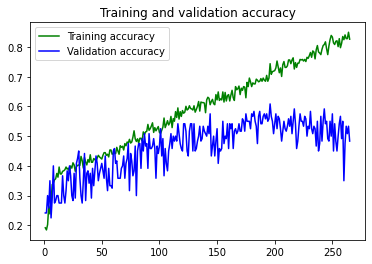

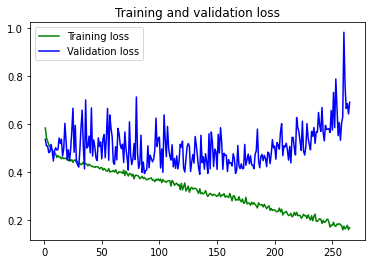

In [52]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "g", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "g", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [17]:

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [55]:
# Loads the weights
model.load_weights("BestModel")

In [59]:
# When using generators, you can calculate precision, recall, F1-score, etc. using the following idea (roughly)
Y = [] # empty list of true labels
P = [] # empty list of predictions


for _ in range(1):
  img, label = test_dataset.next()
  p = model.predict(img)
  Y.extend(label)
  P.extend(p)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y, p.round())
precision = precision_score(Y, p.round(), average="macro") # precision_score(Y, p.round())
recall = recall_score(Y, p.round(), average="macro")
f1 = f1_score(Y, p.round(), average="macro")

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

Accuracy:  0.5416666666666666
Precision:  0.5366666666666667
Recall:  0.5428571428571429
F1:  0.5162337662337662


In [ ]:
while True:pass